In [1]:
import time
start_time = time.time()
import datetime

import sys, os, shutil
sys.path.append("../..")

import LoadSR3500Data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
calfile = '/g/data/up71/projects/CalVal_Phase2/FLAME/CALIBRATION/RadCalCoeff_GT08_.csv'


In [3]:
allSR3500data = LoadSR3500Data.load_from_dir('/g/data/up71/projects/CalVal_Phase2/SR3500/11FEB21/RAW_DATA/19FEB21/', calfile)

In [4]:
allSR3500data.Wavelength = allSR3500data.Wavelength.astype(int)

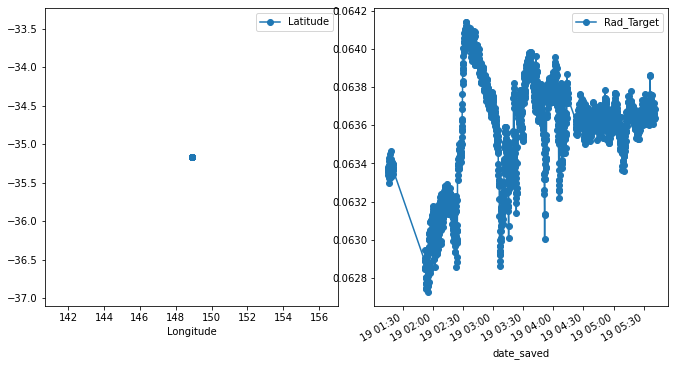

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.5, 5.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=0.5)

allSR3500data[allSR3500data.index==550].plot('Longitude', 'Latitude', style='-o', ax=axes[0])
allSR3500data[allSR3500data.index==550].plot('date_saved', 'Rad_Target', style='-o', ax=axes[1])


In [6]:
from SRC import MakeSpecDF

In [7]:
allSR3500data['Line'] = 1
allSR3500data.rename(columns={'Rad_Target':'radiance'}, inplace = True)

In [8]:
allSR3500Spec = MakeSpecDF.make_spec_df(allSR3500data)

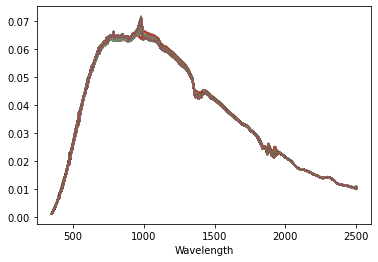

In [9]:
allSR3500Spec.plot(legend=False)

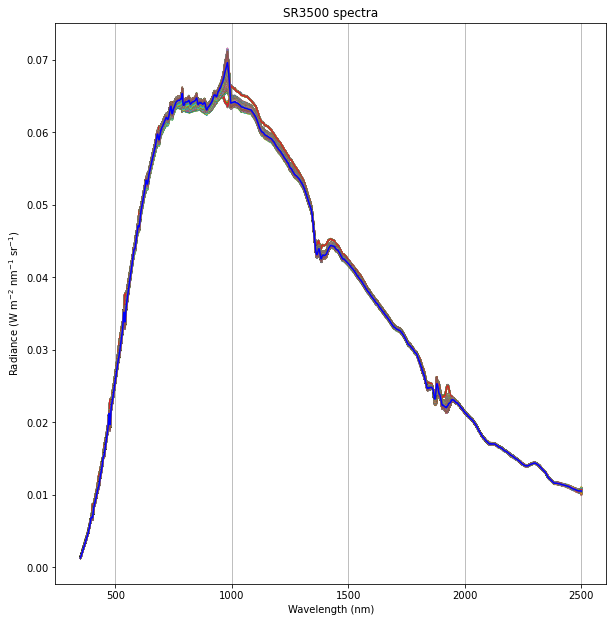

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=2.5, h_pad=3.5)
allSR3500Spec.plot(ax=axes, legend=False)
allSR3500Spec.mean(axis=1).plot(ax=axes, color='b')

axes.set_title('SR3500 spectra')


axes.set_xlabel('Wavelength (nm)')
axes.set_ylabel('Radiance (W m$^{-2}$ nm$^{-1}$ sr$^{-1}$)')
axes.grid('on', which='minor', axis='x')
axes.grid('on', which='major', axis='x')

#axes.set_xlim(1880,1890)
plt.savefig('FIG_Spectra_19FEB21_ALL.png')

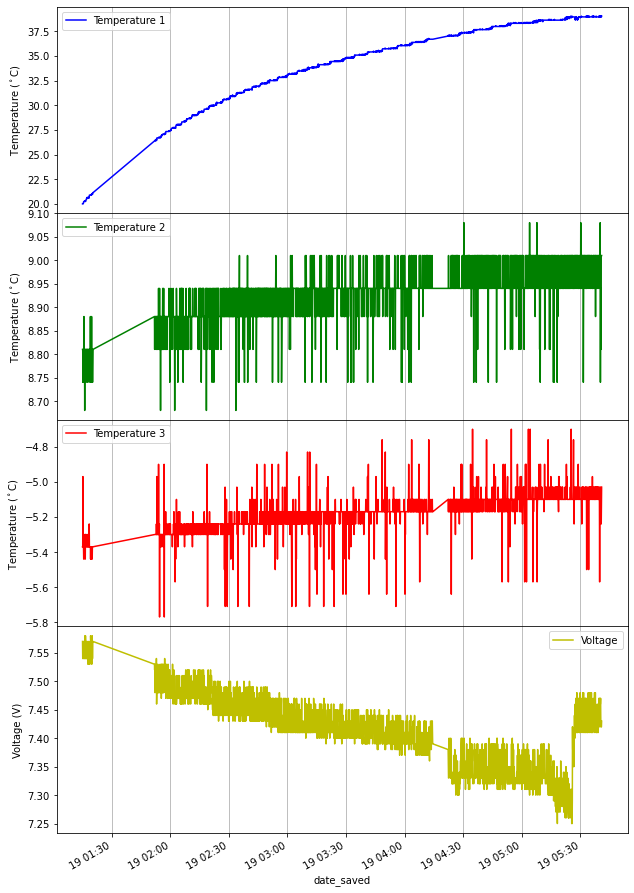

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8.5, 14.5))
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(hspace=0)

allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Temp1', color='b', ax=axes[0])
allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Temp2', color='g', ax=axes[1])
allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Temp3', color='r', ax=axes[2])
allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Voltage', color='y', ax=axes[3])

leglab = ['Temperature 1', 'Temperature 2', 'Temperature 3', 'Voltage']

axes[0].set_xticklabels('off')
axes[1].set_xticklabels('off')
axes[2].set_xticklabels('off')

for i in range(3):
    axes[i].set_ylabel('Temperature ($^\circ$C)')
axes[3].set_ylabel('Voltage (V)')
    
for i in range(4):
    axes[i].grid('on', which='minor', axis='x')
    axes[i].grid('on', which='major', axis='x')
    axes[i].legend([leglab[i]])
    

plt.savefig('TempVolt_19FEB21_A.png')

In [12]:
def MakeMeanSpec(allASDdata, allASDSpec, startWavelength, endWavelength):
        dftemp = pd.DataFrame([allASDdata.date_saved.unique(), allASDSpec[np.logical_and(allASDSpec.index >startWavelength, allASDSpec.index < endWavelength)].mean(axis=0)]).T
        dftemp.columns = ['date_saved', 'rad_mean']
        return dftemp

In [13]:
allSR3500_450_700_mean = MakeMeanSpec(allSR3500data, allSR3500Spec, 450, 700)
allSR3500_1100_1200_mean = MakeMeanSpec(allSR3500data, allSR3500Spec, 1100, 1200)
allSR3500_2000_2200_mean = MakeMeanSpec(allSR3500data, allSR3500Spec, 2000, 2200)

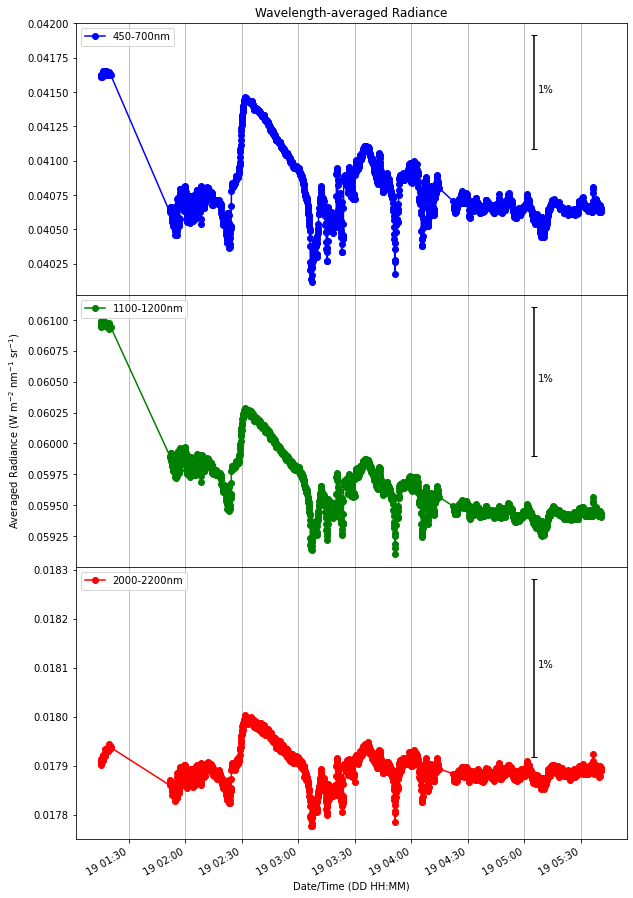

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8.5, 14.5))
plt.tight_layout(pad=1.5, w_pad=0.0, h_pad=0.0)
fig.subplots_adjust(hspace=0)
allSR3500_450_700_mean.plot('date_saved', 'rad_mean', ax=axes[0], style='-o', color='b')
allSR3500_1100_1200_mean.plot('date_saved', 'rad_mean', ax=axes[1], style='-o', color='g')
allSR3500_2000_2200_mean.plot('date_saved', 'rad_mean', ax=axes[2], style='-o', color='r')
axes[1].set_ylabel('Averaged Radiance (W m$^{-2}$ nm$^{-1}$ sr$^{-1}$)')
axes[0].legend(['450-700nm'])
axes[1].legend(['1100-1200nm'])
axes[2].legend(['2000-2200nm'])
axes[0].set_title('Wavelength-averaged Radiance')
axes[2].set_xlabel('Date/Time (DD HH:MM)')
axes[0].set_xticklabels('off')
axes[1].set_xticklabels('off')
for i in range(3):
    axes[i].grid('on', which='minor', axis='x')
    axes[i].grid('on', which='major', axis='x')
    
axes[0].errorbar(x=datetime.datetime(2021,2,19,5,5), y=0.0415, yerr=0.000415, color='black', mfc='white', mec='black', capsize=3)
axes[0].text(datetime.datetime(2021,2,19,5,7), 0.0415, '1%')
axes[1].errorbar(x=datetime.datetime(2021,2,19,5,5), y=0.0605, yerr=0.000605, color='black', mfc='white', mec='black', capsize=3)
axes[1].text(datetime.datetime(2021,2,19,5,7), 0.0605, '1%')
axes[2].errorbar(x=datetime.datetime(2021,2,19,5,5), y=0.0181, yerr=0.000181, color='black', mfc='white', mec='black', capsize=3)
axes[2].text(datetime.datetime(2021,2,19,5,7), 0.0181, '1%')

plt.savefig('WavAvg_19FEB21.png')

Text(2021-02-19 05:47:00, 0.0181, '1%')

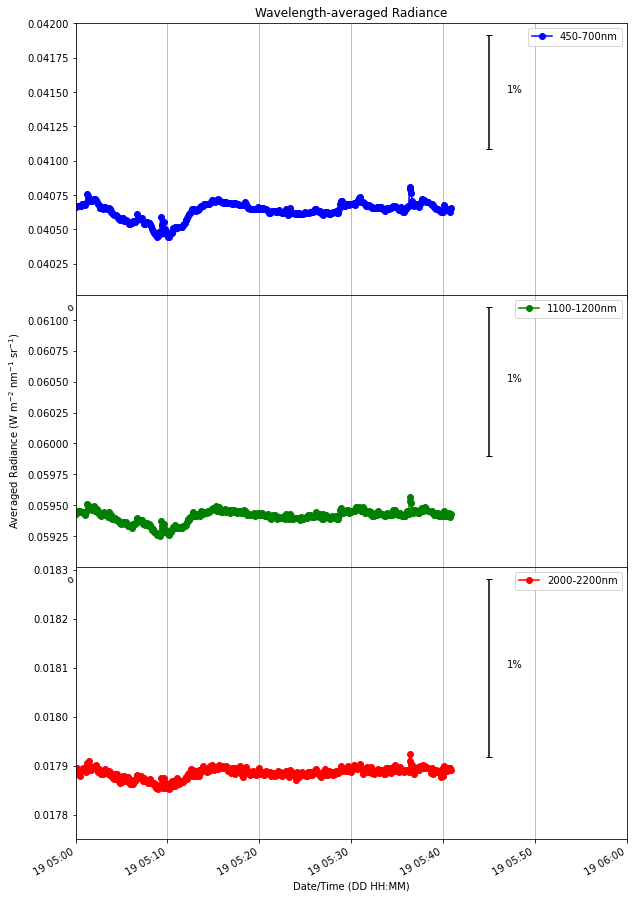

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8.5, 14.5))
plt.tight_layout(pad=1.5, w_pad=0.0, h_pad=0.0)
fig.subplots_adjust(hspace=0)
allSR3500_450_700_mean.plot('date_saved', 'rad_mean', ax=axes[0], style='-o', color='b')
allSR3500_1100_1200_mean.plot('date_saved', 'rad_mean', ax=axes[1], style='-o', color='g')
allSR3500_2000_2200_mean.plot('date_saved', 'rad_mean', ax=axes[2], style='-o', color='r')
axes[1].set_ylabel('Averaged Radiance (W m$^{-2}$ nm$^{-1}$ sr$^{-1}$)')
axes[0].legend(['450-700nm'])
axes[1].legend(['1100-1200nm'])
axes[2].legend(['2000-2200nm'])
axes[0].set_title('Wavelength-averaged Radiance')
axes[2].set_xlabel('Date/Time (DD HH:MM)')
axes[0].set_xticklabels('off')
axes[1].set_xticklabels('off')
axes[0].set_xlim(datetime.datetime(2021,2,19,5,0), datetime.datetime(2021,2,19,6,0))
axes[1].set_xlim(datetime.datetime(2021,2,19,5,0), datetime.datetime(2021,2,19,6,0))
axes[2].set_xlim(datetime.datetime(2021,2,19,5,0), datetime.datetime(2021,2,19,6,0))

for i in range(3):
    axes[i].grid('on', which='minor', axis='x')
    axes[i].grid('on', which='major', axis='x')
    
axes[0].errorbar(x=datetime.datetime(2021,2,19,5,45), y=0.0415, yerr=0.000415, color='black', mfc='white', mec='black', capsize=3)
axes[0].text(datetime.datetime(2021,2,19,5,47), 0.0415, '1%')
axes[1].errorbar(x=datetime.datetime(2021,2,19,5,45), y=0.0605, yerr=0.000605, color='black', mfc='white', mec='black', capsize=3)
axes[1].text(datetime.datetime(2021,2,19,5,47), 0.0605, '1%')
axes[2].errorbar(x=datetime.datetime(2021,2,19,5,45), y=0.0181, yerr=0.000181, color='black', mfc='white', mec='black', capsize=3)
axes[2].text(datetime.datetime(2021,2,19,5,47), 0.0181, '1%')


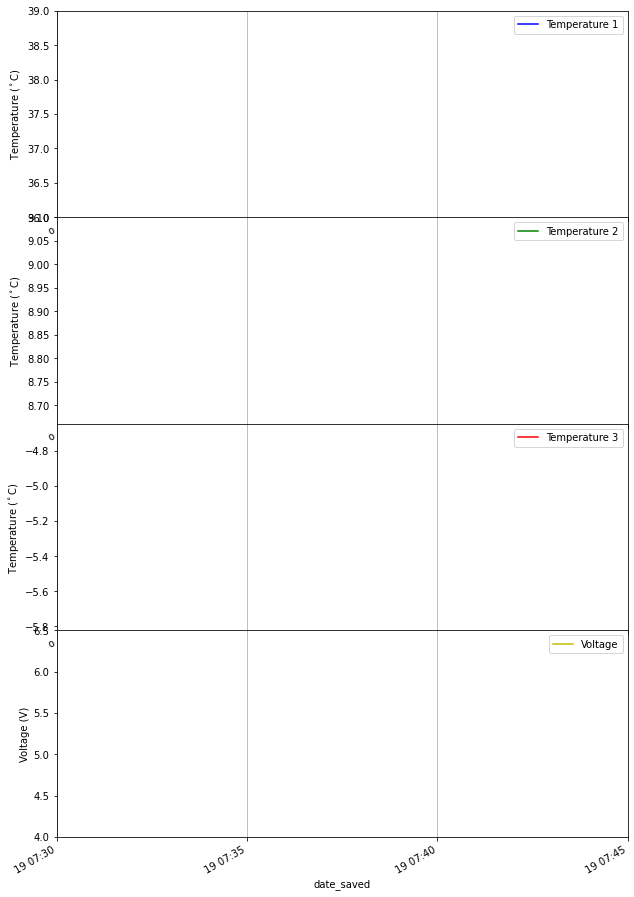

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8.5, 14.5))
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=2.5)
fig.subplots_adjust(hspace=0)

allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Temp1', color='b', ax=axes[0])
allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Temp2', color='g', ax=axes[1])
allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Temp3', color='r', ax=axes[2])
allSR3500data[allSR3500data.Wavelength==350].plot('date_saved', 'Voltage', color='y', ax=axes[3])

leglab = ['Temperature 1', 'Temperature 2', 'Temperature 3', 'Voltage']

axes[0].set_xticklabels('off')
axes[1].set_xticklabels('off')
axes[2].set_xticklabels('off')
axes[0].set_xlim(datetime.datetime(2021,2,19,7,30), datetime.datetime(2021,2,19,7,45))
axes[1].set_xlim(datetime.datetime(2021,2,19,7,30), datetime.datetime(2021,2,19,7,45))
axes[2].set_xlim(datetime.datetime(2021,2,19,7,30), datetime.datetime(2021,2,19,7,45))
axes[3].set_xlim(datetime.datetime(2021,2,19,7,30), datetime.datetime(2021,2,19,7,45))
axes[0].set_ylim(36,39)
axes[3].set_ylim(4,6.5)
for i in range(3):
    axes[i].set_ylabel('Temperature ($^\circ$C)')
axes[3].set_ylabel('Voltage (V)')
    
for i in range(4):
    axes[i].grid('on', which='minor', axis='x')
    axes[i].grid('on', which='major', axis='x')
    axes[i].legend([leglab[i]])
